<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/lec9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target


In [2]:
X.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [12]:
from sklearn.model_selection import train_test_split # биьлиотека для разбивки
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)


In [15]:
from sklearn.tree import DecisionTreeRegressor # Библиотека дерева
model_dt = DecisionTreeRegressor() # создаем на основе класса модель для обучения
model_dt.fit(Xtrain, ytrain) # Обучаем модель

DecisionTreeRegressor()

In [16]:
pred_dt = model_dt.predict(Xtest) # предсказываем на тестовых данных
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, pred_dt) # оцениваем эффективность модели

0.5383577996087209

In [18]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor() # Рамдомное дерево
model_rf.fit(Xtrain, ytrain)

RandomForestRegressor()

In [30]:
pred_rf = model_rf.predict(Xtest)
mean_squared_error(ytest, pred_rf)

0.26159827420467757

?RandomForestRegressor
- n_estimators — число деревьев;
- criterion — критерий информативности для построения дерева;
- max_depth — глубина деревьев в лесу;
- min_samples_split — минимальное число объектов, необходимое для
разбиения вершины;
- min_samples_leaf — минимальное число объектов в вершине, для того
чтобы она была листом;
- max_features — максимальное число признаков, из которых ищем
наилучшее разбиение на каждом шаге построения дерева;
- max_samples — максимальное количество объектов в подвыборке,
сформированной при помощи бутстрепа из исходной выборки.


In [24]:
N = []
MSE = []
for n in np.arange(10, 120, 20):
  rf = RandomForestRegressor(n_estimators = n)
  rf.fit(Xtrain, ytrain)
  pred_rf = rf.predict(Xtest)
  N.append(n)
  MSE.append(mean_squared_error(ytest, pred_rf))


In [26]:
print(N)
print(MSE)

[10, 30, 50, 70, 90, 110]
[0.28818439094646375, 0.27060920659387167, 0.2618823255596594, 0.26180412947145204, 0.26049978983718636, 0.25809000371415697]


Text(0, 0.5, 'MSE on test')

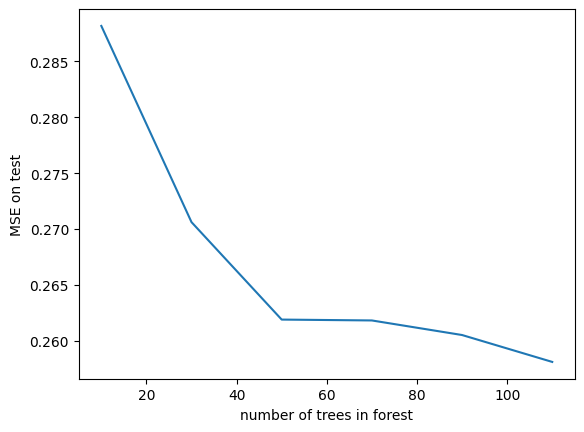

In [25]:
from matplotlib import pyplot as plt
plt.plot(N, MSE, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('MSE on test')

Text(0, 0.5, 'MSE on test')

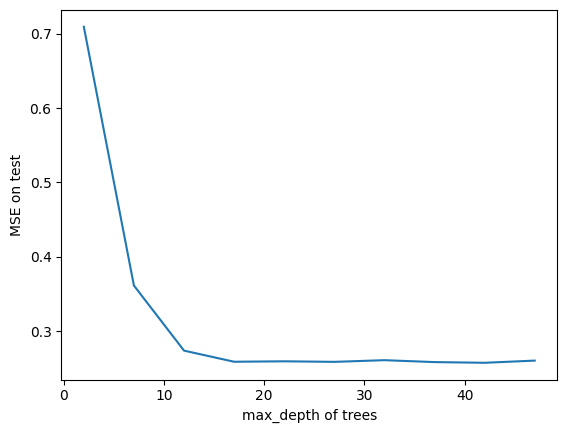

In [31]:
D = []
MSE = []
for d in np.arange(2, 50, 5):
  rf = RandomForestRegressor(n_estimators = 100, max_depth = d)
  rf.fit(Xtrain, ytrain)
  pred_rf = rf.predict(Xtest)
  D.append(d)
  MSE.append(mean_squared_error(ytest, pred_rf))
plt.plot(D, MSE, '-')
plt.xlabel('max_depth of trees')
plt.ylabel('MSE on test')

In [40]:
model_rf = RandomForestRegressor(n_estimators = 100, max_depth = 17)
model_rf.fit(Xtrain, ytrain)
pred_rf = model_rf.predict(Xtest)
mean_squared_error(ytest, pred_rf)

0.25952611068933645